In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import *
from FFNN import FFNN

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int32)

np.random.seed(42)
indices = np.random.choice(len(X), 20000, replace=False)
X = X[indices]
y = y[indices]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

plotter = Plotter()

In [3]:
ffnn1 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='none',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn1.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn1.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 105.66it/s, loss=0.0395]


Train Loss: 0.0395 - Val Loss: 0.0208


Epoch 2/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 106.11it/s, loss=0.0167]


Train Loss: 0.0167 - Val Loss: 0.0159


Epoch 3/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 100.16it/s, loss=0.0103]


Train Loss: 0.0103 - Val Loss: 0.0149


Epoch 4/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 103.80it/s, loss=0.00649]


Train Loss: 0.0065 - Val Loss: 0.0146


Epoch 5/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 113.03it/s, loss=0.00403]


Train Loss: 0.0040 - Val Loss: 0.0150


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 117.91it/s, loss=0.0023]


Train Loss: 0.0023 - Val Loss: 0.0167


Epoch 7/20: 100%|██████████████████████████████████| 438/438 [00:03<00:00, 123.24it/s, loss=0.00166]


Train Loss: 0.0017 - Val Loss: 0.0167


Epoch 8/20: 100%|██████████████████████████████████| 438/438 [00:00<00:00, 439.89it/s, loss=0.00103]


Train Loss: 0.0010 - Val Loss: 0.0164


Epoch 9/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 123.19it/s, loss=0.000771]


Train Loss: 0.0008 - Val Loss: 0.0182


Epoch 10/20: 100%|████████████████████████████████| 438/438 [00:03<00:00, 124.73it/s, loss=0.000613]


Train Loss: 0.0006 - Val Loss: 0.0186


Epoch 11/20: 100%|████████████████████████████████| 438/438 [00:03<00:00, 120.57it/s, loss=0.000489]


Train Loss: 0.0005 - Val Loss: 0.0194


Epoch 12/20: 100%|████████████████████████████████| 438/438 [00:03<00:00, 122.66it/s, loss=0.000293]


Train Loss: 0.0003 - Val Loss: 0.0207


Epoch 13/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 124.11it/s, loss=4.57e-5]


Train Loss: 0.0000 - Val Loss: 0.0210


Epoch 14/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 118.19it/s, loss=5.08e-5]


Train Loss: 0.0001 - Val Loss: 0.0207


Epoch 15/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 116.40it/s, loss=1.76e-5]


Train Loss: 0.0000 - Val Loss: 0.0209


Epoch 16/20: 100%|█████████████████████████████████| 438/438 [00:01<00:00, 277.55it/s, loss=9.54e-6]


Train Loss: 0.0000 - Val Loss: 0.0211


Epoch 17/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 118.78it/s, loss=7.48e-6]


Train Loss: 0.0000 - Val Loss: 0.0213


Epoch 18/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 117.38it/s, loss=6.41e-6]


Train Loss: 0.0000 - Val Loss: 0.0214


Epoch 19/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 115.09it/s, loss=5.67e-6]


Train Loss: 0.0000 - Val Loss: 0.0216


Epoch 20/20: 100%|█████████████████████████████████| 438/438 [00:03<00:00, 111.46it/s, loss=5.11e-6]


Train Loss: 0.0000 - Val Loss: 0.0217
Akurasi: 96.47%


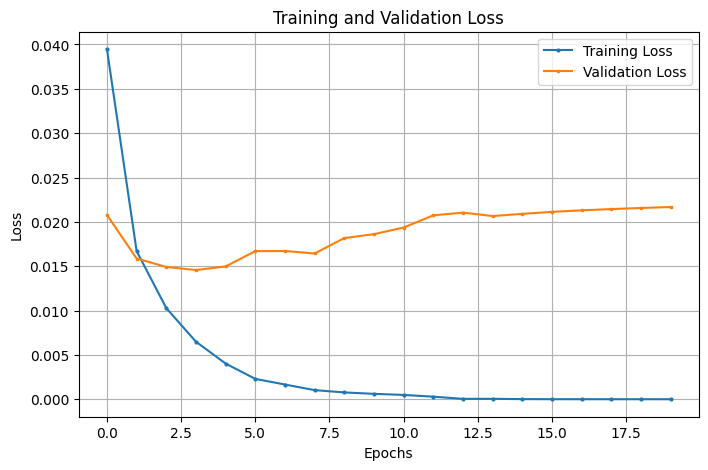

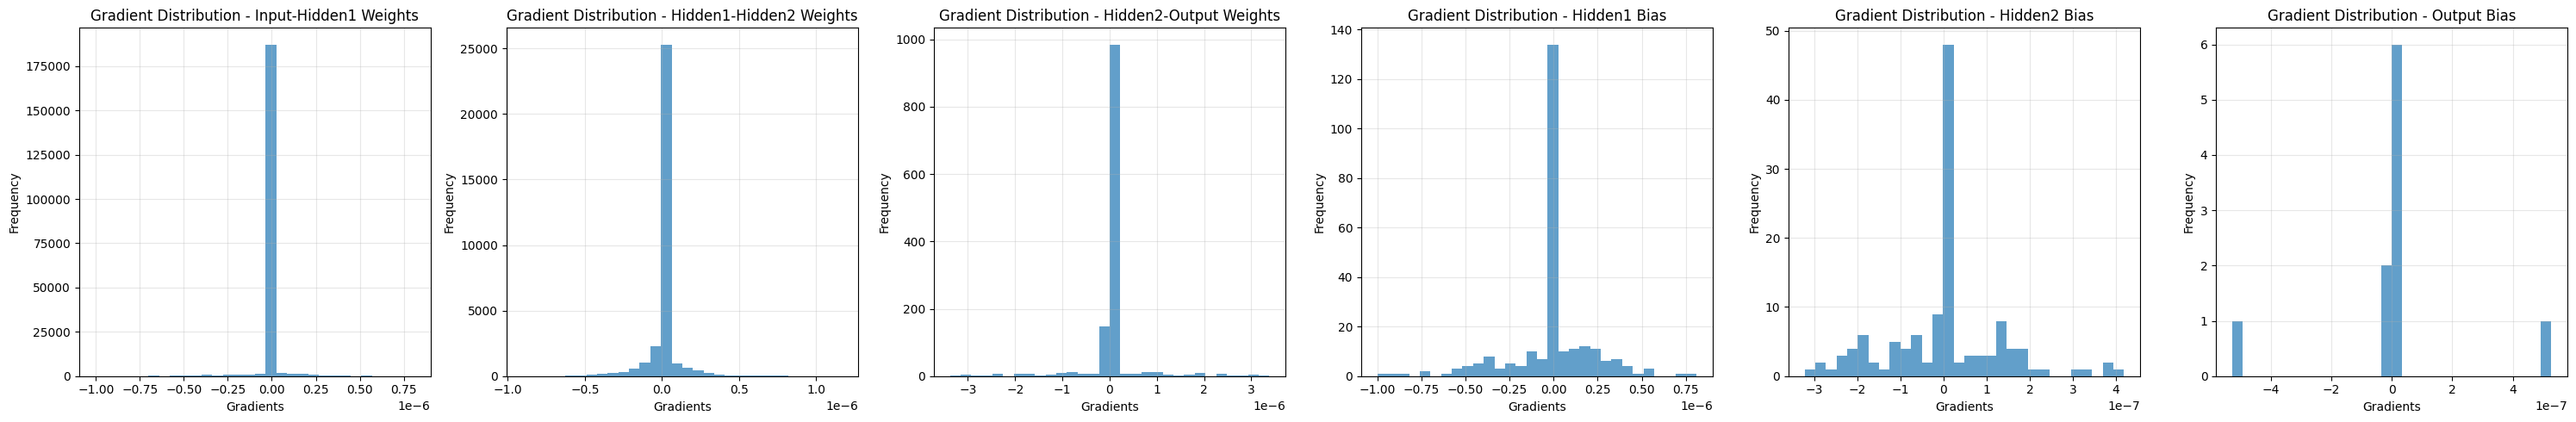

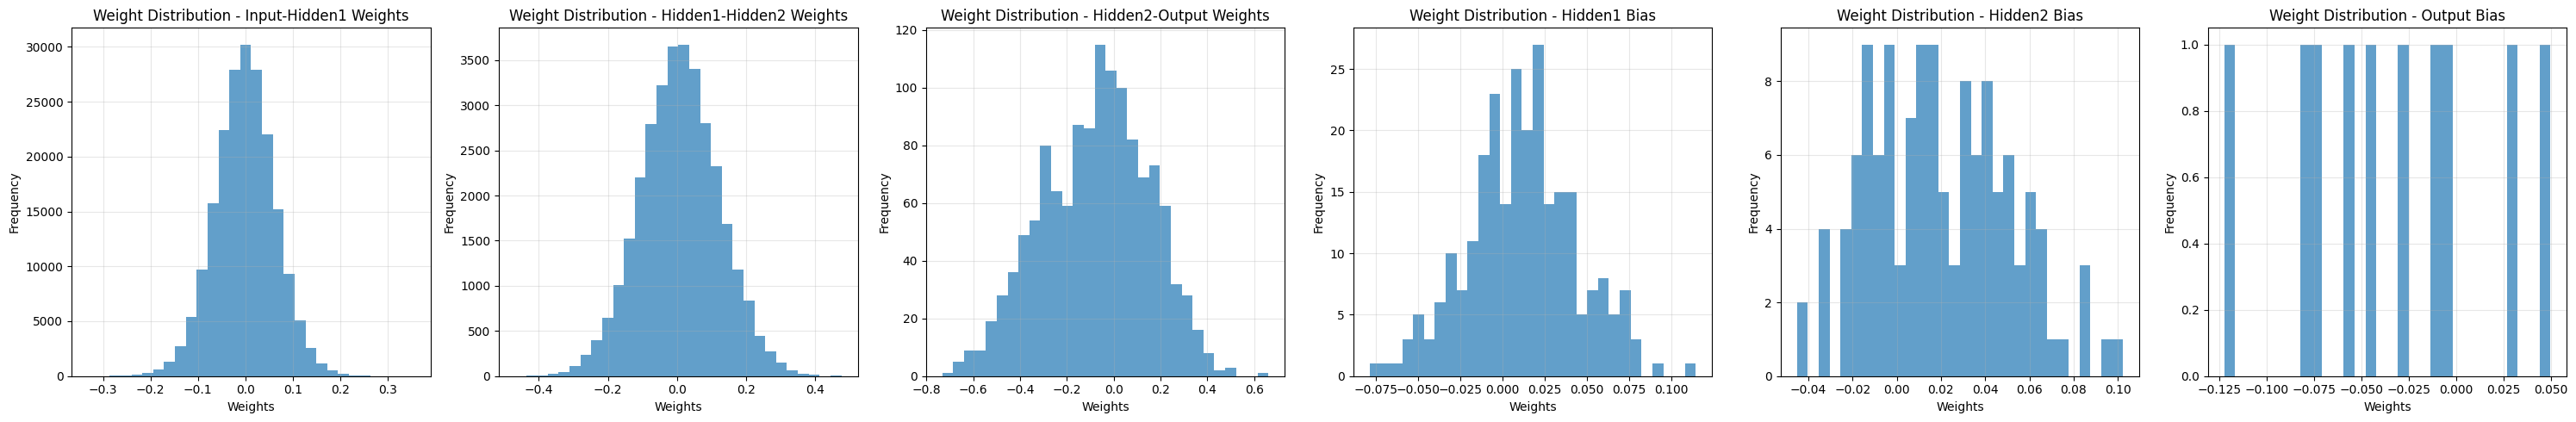

In [4]:
plotter.plot_training_history(ffnn1)
plotter.plot_gradient_distributions(ffnn1)
plotter.plot_weight_distributions(ffnn1)

In [5]:
ffnn2 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l1',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn2.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn2.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|█████████████████████████████████████| 438/438 [00:03<00:00, 110.54it/s, loss=1.14]


Train Loss: 1.1398 - Val Loss: 0.3261


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 123.88it/s, loss=0.317]


Train Loss: 0.3166 - Val Loss: 0.3043


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 122.71it/s, loss=0.302]


Train Loss: 0.3015 - Val Loss: 0.2935


Epoch 4/20: 100%|████████████████████████████████████| 438/438 [00:00<00:00, 476.08it/s, loss=0.293]


Train Loss: 0.2935 - Val Loss: 0.2869


Epoch 5/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 119.41it/s, loss=0.287]


Train Loss: 0.2873 - Val Loss: 0.2810


Epoch 6/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 126.10it/s, loss=0.282]


Train Loss: 0.2821 - Val Loss: 0.2764


Epoch 7/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 126.82it/s, loss=0.278]


Train Loss: 0.2782 - Val Loss: 0.2729


Epoch 8/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 131.03it/s, loss=0.275]


Train Loss: 0.2746 - Val Loss: 0.2691


Epoch 9/20: 100%|████████████████████████████████████| 438/438 [00:03<00:00, 127.75it/s, loss=0.271]


Train Loss: 0.2705 - Val Loss: 0.2651


Epoch 10/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 127.43it/s, loss=0.266]


Train Loss: 0.2664 - Val Loss: 0.2611


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 128.05it/s, loss=0.263]


Train Loss: 0.2632 - Val Loss: 0.2586


Epoch 12/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 131.49it/s, loss=0.261]


Train Loss: 0.2607 - Val Loss: 0.2562


Epoch 13/20: 100%|███████████████████████████████████| 438/438 [00:00<00:00, 445.47it/s, loss=0.258]


Train Loss: 0.2582 - Val Loss: 0.2536


Epoch 14/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 125.14it/s, loss=0.256]


Train Loss: 0.2557 - Val Loss: 0.2510


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 110.52it/s, loss=0.253]


Train Loss: 0.2535 - Val Loss: 0.2489


Epoch 16/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 130.48it/s, loss=0.252]


Train Loss: 0.2517 - Val Loss: 0.2475


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 106.46it/s, loss=0.251]


Train Loss: 0.2506 - Val Loss: 0.2463


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 124.58it/s, loss=0.249]


Train Loss: 0.2495 - Val Loss: 0.2452


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 125.48it/s, loss=0.248]


Train Loss: 0.2483 - Val Loss: 0.2443


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 125.73it/s, loss=0.248]


Train Loss: 0.2476 - Val Loss: 0.2437
Akurasi: 82.53%


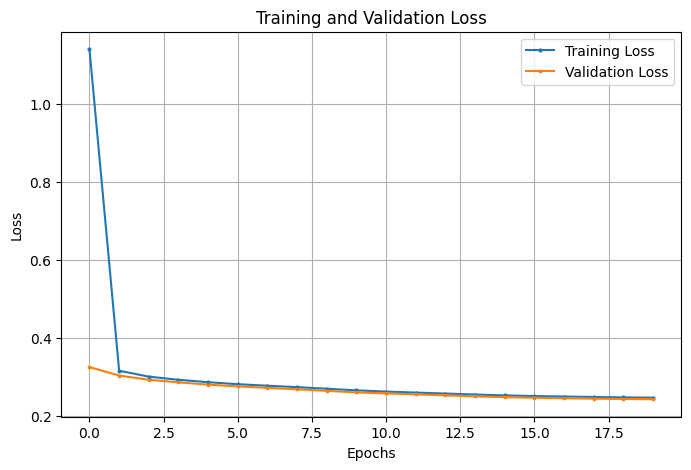

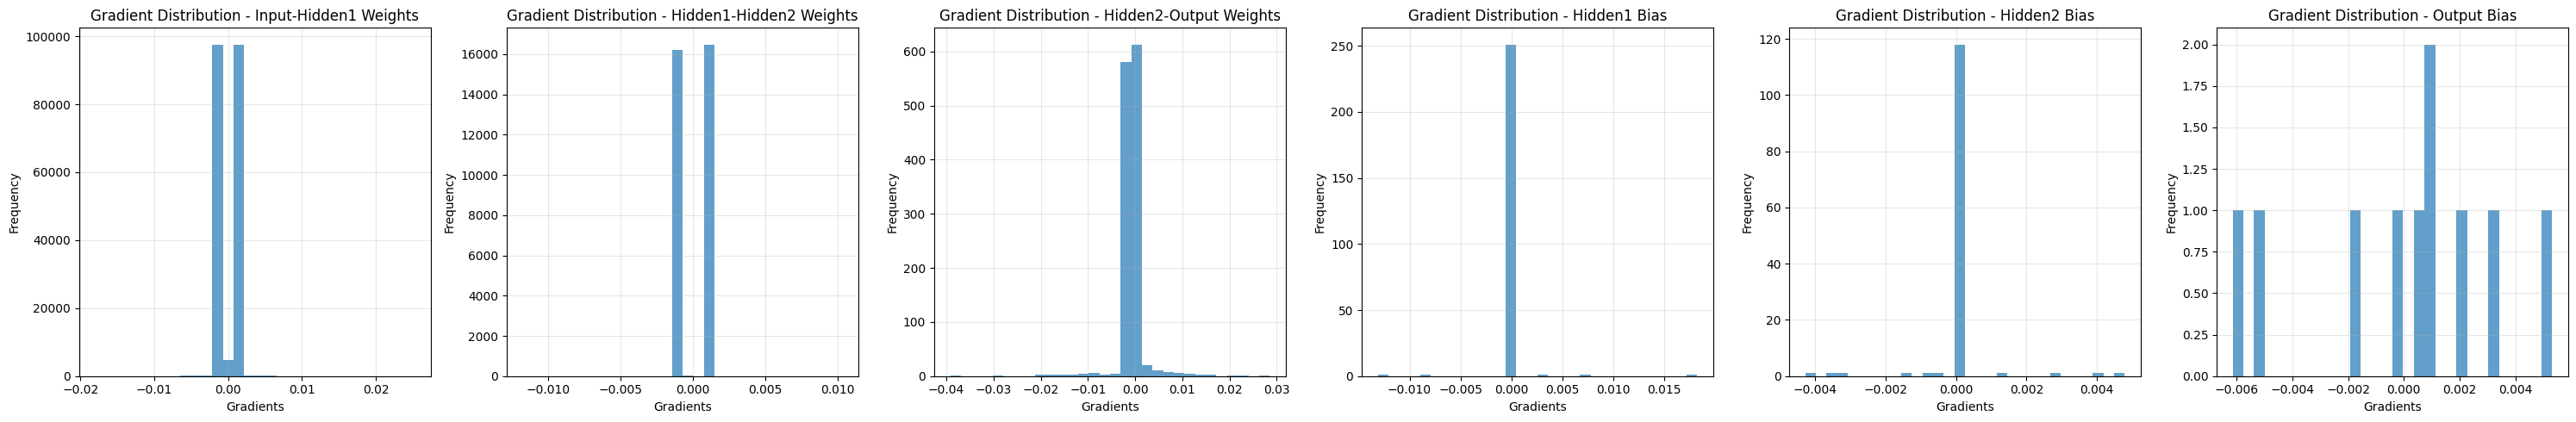

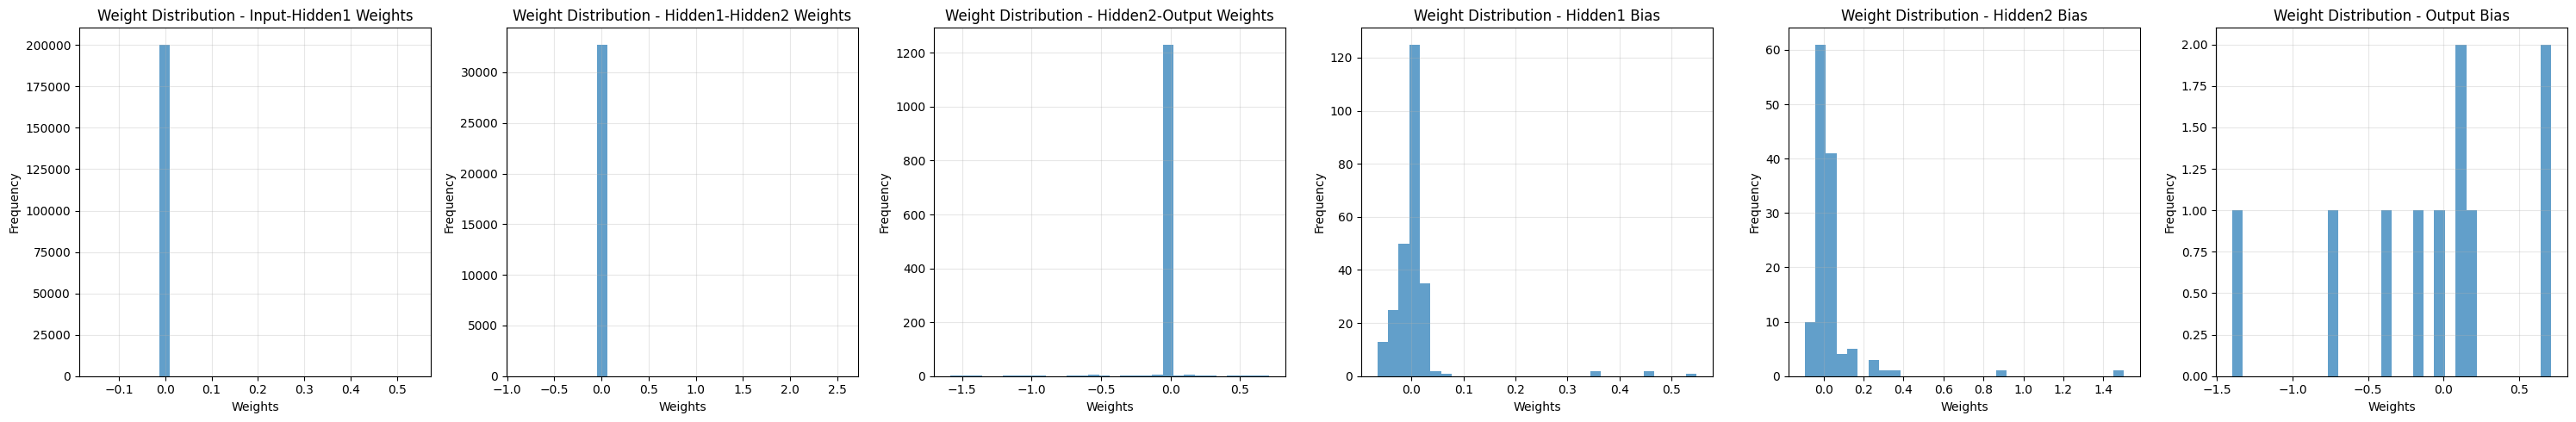

In [6]:
plotter.plot_training_history(ffnn2)
plotter.plot_gradient_distributions(ffnn2)
plotter.plot_weight_distributions(ffnn2)

In [7]:
ffnn3 = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he',
    seed=69420
)
ffnn3.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn3.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 100.16it/s, loss=0.182]


Train Loss: 0.1819 - Val Loss: 0.0868


Epoch 2/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 97.46it/s, loss=0.0739]


Train Loss: 0.0739 - Val Loss: 0.0640


Epoch 3/20: 100%|████████████████████████████████████| 438/438 [00:04<00:00, 93.08it/s, loss=0.0628]


Train Loss: 0.0628 - Val Loss: 0.0593


Epoch 4/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.30it/s, loss=0.0598]


Train Loss: 0.0598 - Val Loss: 0.0576


Epoch 5/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.25it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0566


Epoch 6/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 106.22it/s, loss=0.0575]


Train Loss: 0.0575 - Val Loss: 0.0558


Epoch 7/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 105.45it/s, loss=0.0568]


Train Loss: 0.0568 - Val Loss: 0.0555


Epoch 8/20: 100%|███████████████████████████████████| 438/438 [00:01<00:00, 277.00it/s, loss=0.0562]


Train Loss: 0.0562 - Val Loss: 0.0551


Epoch 9/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 104.76it/s, loss=0.0557]


Train Loss: 0.0557 - Val Loss: 0.0548


Epoch 10/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 105.12it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0545


Epoch 11/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 103.91it/s, loss=0.055]


Train Loss: 0.0550 - Val Loss: 0.0544


Epoch 12/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 107.49it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0541


Epoch 13/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 106.93it/s, loss=0.0544]


Train Loss: 0.0544 - Val Loss: 0.0538


Epoch 14/20: 100%|██████████████████████████████████| 438/438 [00:04<00:00, 107.56it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0536


Epoch 15/20: 100%|███████████████████████████████████| 438/438 [00:03<00:00, 109.95it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0535


Epoch 16/20: 100%|██████████████████████████████████| 438/438 [00:01<00:00, 277.91it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0534


Epoch 17/20: 100%|███████████████████████████████████| 438/438 [00:05<00:00, 87.40it/s, loss=0.0537]


Train Loss: 0.0537 - Val Loss: 0.0534


Epoch 18/20: 100%|███████████████████████████████████| 438/438 [00:08<00:00, 51.76it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0533


Epoch 19/20: 100%|███████████████████████████████████| 438/438 [00:07<00:00, 60.96it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0533


Epoch 20/20: 100%|███████████████████████████████████| 438/438 [00:04<00:00, 98.02it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0533
Akurasi: 93.87%


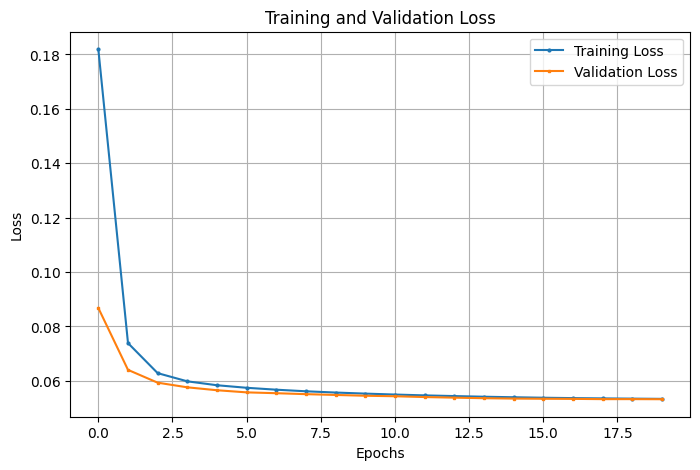

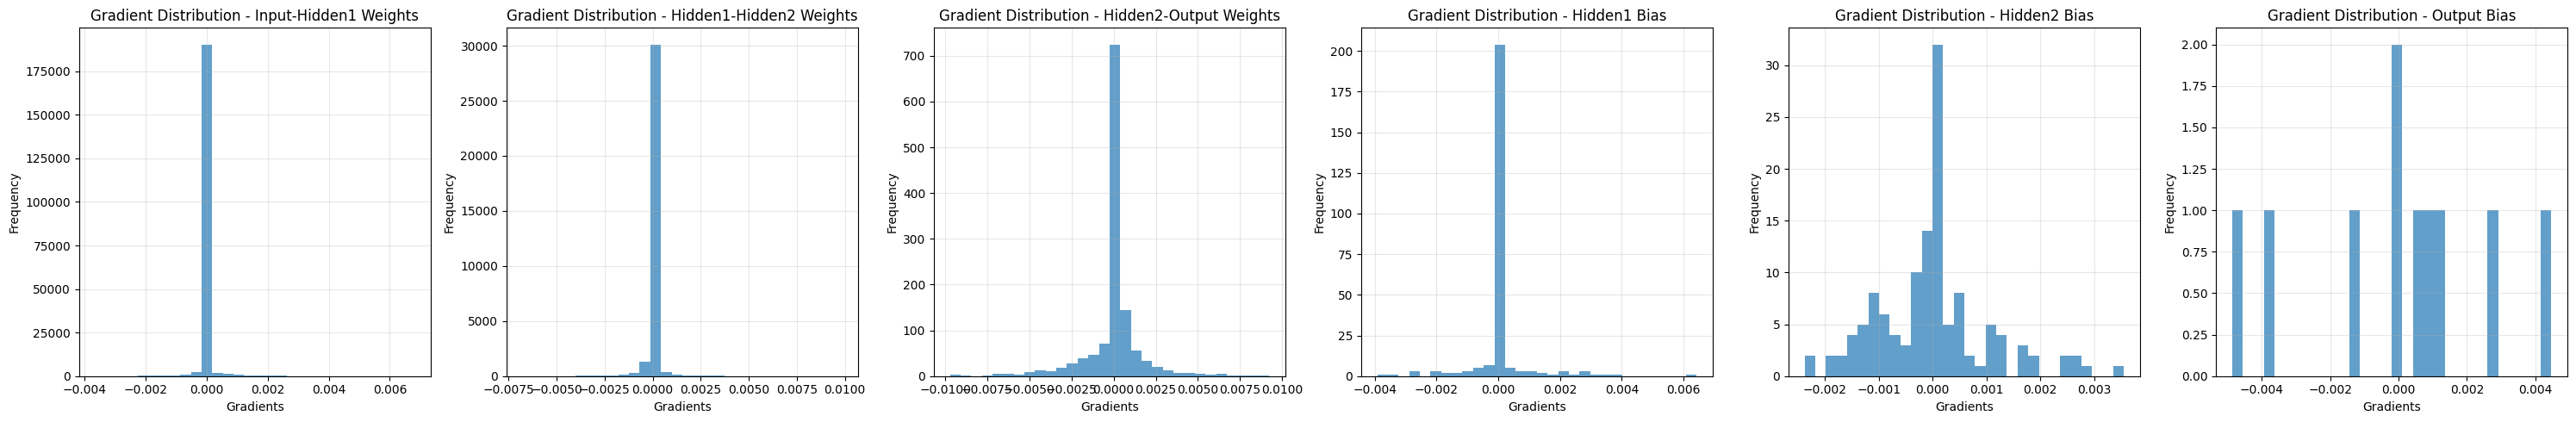

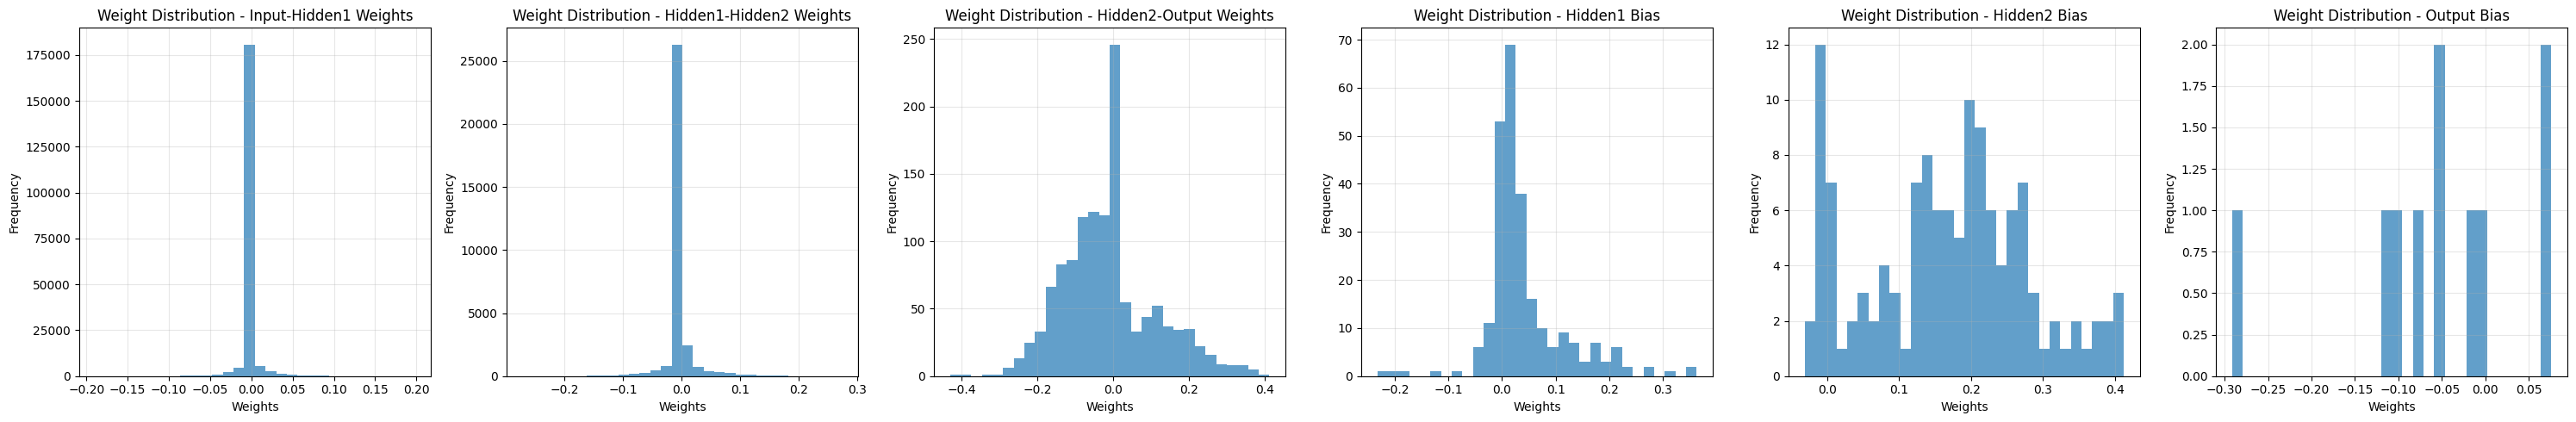

In [8]:
plotter.plot_training_history(ffnn3)
plotter.plot_gradient_distributions(ffnn3)
plotter.plot_weight_distributions(ffnn3)